<br>
<br>

# Missing Value Imputation:

<br>
<br>

In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


In [4]:
df = pd.read_csv("dataset/titanic_toy.csv")

df.head(2)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1


In [7]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

<br>
<br>

# Missing value with (pandas):

<br>
<br>

In [11]:
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(columns=["Survived"]),
    df["Survived"],
    test_size=0.2
)

In [17]:

X_train["Age_mean"] = X_train["Age"].fillna(value=X_train["Age"].mean())
X_train["Age_median"] = X_train["Age"].fillna(X_train["Age"].median())


X_train["Fare_mean"] = X_train["Fare"].fillna(X_train["Fare"].mean())
X_train["Fare_median"] = X_train["Fare"].fillna(X_train["Fare"].median())

X_train.sample(5)


,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
706,45.0,13.500,0,45.00,45.0,13.500,13.500
298,NaN,30.500,0,29.83,28.0,30.500,30.500
573,NaN,7.750,0,29.83,28.0,7.750,7.750
274,NaN,7.750,0,29.83,28.0,7.750,7.750
119,2.0,31.275,6,2.00,2.0,31.275,31.275


In [19]:


print(f"Orginal age variable Variance : {X_train["Age"].var()}")
print(f"Age_mean age variable Variance : {X_train["Age_mean"].var()}")
print(f"Age_median age variable Variance : {X_train["Age_median"].var()}")

print()

print(f"Fare age variable Variance : {X_train["Fare"].var()}")
print(f"Fare_mean age variable Variance : {X_train["Fare_mean"].var()}")
print(f"Fare_median age variable Variance : {X_train["Fare_median"].var()}")



Orginal age variable Variance : 214.7167780487805
Age_mean age variable Variance : 173.34378424753868
Age_median age variable Variance : 173.86490815416644

Fare age variable Variance : 2785.1438186752016
Fare_mean age variable Variance : 2632.3722168069417
Fare_median age variable Variance : 2649.7554657364435


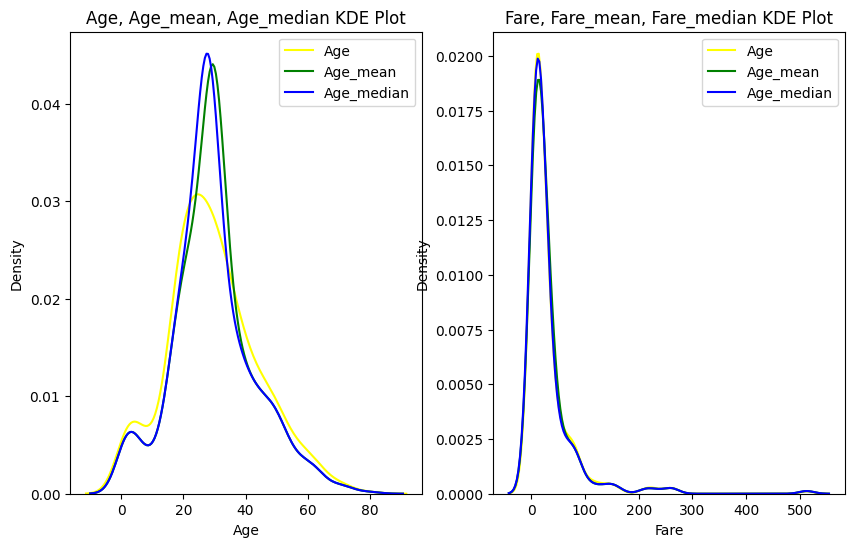

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))


sns.kdeplot(data=df["Age"], ax=ax[0], color="yellow", label="Age")
sns.kdeplot(X_train["Age_mean"], ax=ax[0], color="green", label="Age_mean")
sns.kdeplot(X_train["Age_median"], ax=ax[0], color="blue", label="Age_median")

ax[0].set_title("Age, Age_mean, Age_median KDE Plot")
ax[0].legend()


sns.kdeplot(data=df["Fare"], ax=ax[1], color="yellow", label="Age")
sns.kdeplot(X_train["Fare_mean"], ax=ax[1], color="green", label="Age_mean")
sns.kdeplot(X_train["Fare_median"], ax=ax[1], color="blue", label="Age_median")

ax[1].set_title("Fare, Fare_mean, Fare_median KDE Plot")
ax[1].legend()

plt.show()


<br>

`mean,median এর density অনেক বেড়ে গিয়েছে যেইটা ml model এর জন্য ভালো নয় । কারণ, আমরা ভ্যালু গুলো mean,median দিয়ে পূর্ণ করেছি । `

`But in the case of fare, we have less NaN value that's why it's kde almost same.`

<br>

In [32]:
# see the covariance 

X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,214.716778,86.177088,-6.255767,214.716778,214.716778,81.081653,81.136521
Fare,86.177088,2785.143819,17.999854,69.257246,73.746908,2785.143819,2785.143819
Family,-6.255767,17.999854,2.457743,-5.050366,-5.001484,17.012520,17.057009
Age_mean,214.716778,69.257246,-5.050366,173.343784,173.343784,65.458325,65.502620
Age_median,214.716778,73.746908,-5.001484,173.343784,173.864908,69.701719,69.627995
Fare_mean,81.081653,2785.143819,17.012520,65.458325,69.701719,2632.372217,2632.372217
Fare_median,81.136521,2785.143819,17.057009,65.502620,69.627995,2632.372217,2649.755466


In [34]:
# see co-relation 

X_train.corr()


,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.102298,-0.294697,1.000000,1.000000,0.099802,0.099467
Fare,0.102298,1.000000,0.215054,0.099330,0.105608,1.000000,1.000000
Family,-0.294697,0.215054,1.000000,-0.244681,-0.241950,0.211508,0.211364
Age_mean,1.000000,0.099330,-0.244681,1.000000,0.998500,0.096903,0.096650
Age_median,1.000000,0.105608,-0.241950,0.998500,1.000000,0.103030,0.102583
Fare_mean,0.099802,1.000000,0.211508,0.096903,0.103030,1.000000,0.996714
Fare_median,0.099467,1.000000,0.211364,0.096650,0.102583,0.996714,1.000000


<Axes: >

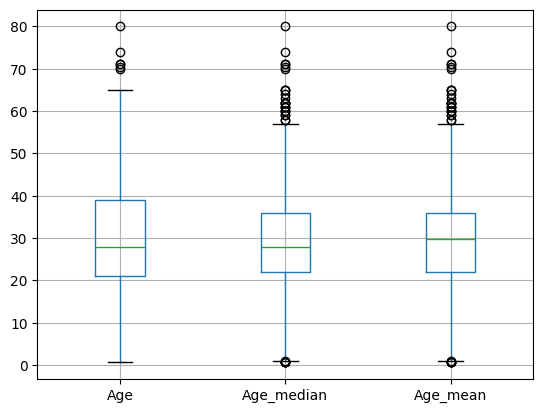

In [39]:
X_train[["Age","Age_median","Age_mean"]].boxplot() # outliers increase in Age_mean and age_median

<Axes: >

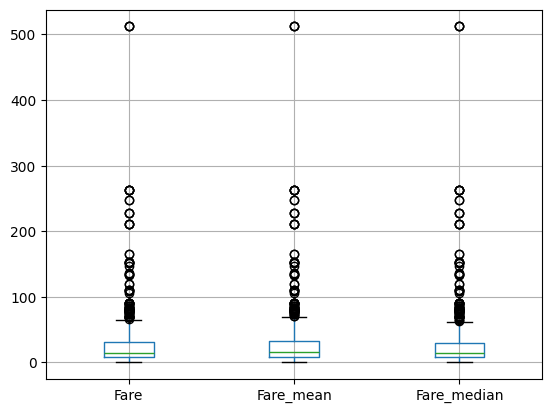

In [42]:
X_train[["Fare","Fare_mean","Fare_median"]].boxplot()

<br>


`Concution: Age এর ক্ষেত্রে আমাদের  mean,median এর density অনেক বেড়ে গিয়েছে । Outliers অনেক বেড়েছে । covariance co-relation এর পরিবর্তন অনেক বেশি । কিন্তু,Fare ক্ষেত্রে অনেক কম । আমাদের Age এর ক্ষেত্রে অন্য কোন Imputation technique খুঁজে বের করতে হবে । `


<br>

<br>

# Now, by the help of sklearn:

<br>

In [43]:
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(columns=["Survived"]),
    df["Survived"],
    random_state=2,
    test_size=0.2,
)

In [45]:
X_train.sample(2)

,Age,Fare,Family
543,32.0,26.00,1
488,30.0,8.05,0


In [47]:

trns1 = ColumnTransformer(
    transformers=[
        ("imputer1",SimpleImputer(strategy="mean"),[0]),
        ("imputer2",SimpleImputer(strategy="median"),[1])
    ],
    remainder="passthrough"
)

In [48]:
trns1.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), [0]),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 [1])])

In [49]:
trns1.named_transformers_

{'imputer1': SimpleImputer(),
 'imputer2': SimpleImputer(strategy='median'),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [50]:
trns1.named_transformers_["imputer1"]

SimpleImputer()

In [51]:
trns1.named_transformers_["imputer1"].statistics_ # mean 

array([29.78590426])

In [52]:
trns1.named_transformers_["imputer2"].statistics_ # median

array([14.4583])

In [54]:
X_train = trns1.transform(X_train)
X_test = trns1.transform(X_test)


X_train


array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])